Hola Leandro!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! Para darte un contexto, trabajo como cientifico de datos en Mercado Libre. Asi que seras revisado por alguien que aplica a diario todo este tipo de tecnicas en su vida laboral ! Espero una vez finalizes este bootcamp, tambien lo apliques ! Buena suerte !

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - *Por favor no mueves, modifiques o elimines los comentarios*.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

# Análisis de videojuegos

La tienda online Ice vende videojuegos por todo el mundo. Partiendo de una base de datos que contiene reseñas usuarios y expertos, los generos, plataformas (por ejemplo Xbox o PlayStation) y datos históricos sobre las ventas de juegos el objetivo es identificar que influye en el exito de un lanzamiento, con el fin de detectar proyectos prometedores y planificar campañas publicitarias para el año 2017.

Una vez identificado el objetivo principal los pasos que se van a seguir para realizar un análisis de los datos son los siguientes:
- Estudiar de forma general cómo se encuentran los datos.
- Realizar un preprocesamiento de datos con la finalidad de verificar datos ausentes, errores en la información, datos duplicados, y errores en el tipo de datos.
- Realizar un calculo de la cantidad de ventas para cada juego en los diferentes años de lanzamiento
- Analizar las variaciones de ventas dependiendo de la plataforma.
- Establecer que datos puede ser útiles para construir un modelo de venttas para el año 2017..
- Verificar que plataformas son líderes en ventas y establecer las que son potencialmente más rentables.
- Analizar mediante gráficas las ventas globales de todos los juegos desglosados por plataforma.
- Descubir si las reseñas de usuarios y profesionales afectan las ventas en las diferentes plataformas.
- Analizar como están distribuidas las ventas por género y establecer cuales pueden ser los géneros más rentables.
- Comprobar las hipotesis de que las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
- Comprobar la hipotesis de que las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- Generar conclusiones sobre los descubrimientos sobre la base de datos entregada.

## Inicialización

Se procederá a realizar una carga de las librerías que se utilizarán para este proyecto:

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
from scipy.stats import levene

### Cargar datos

Se cargará y almacenará los datos en una variable:

In [2]:
# Cargar el archivo de datos en un DataFrame
data=pd.read_csv('/datasets/games.csv')

#Imprimiendo una muestra de los datos:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Explorar los datos iniciales

Vamos a revisar como se encuentran los datos:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Para esta base de datos se tienen las siguientes columnas:
- `Name` - Nombre del videojuego.
- `Platform` - Plataforma en la cual fue publicado
- `Year_of_Release` - Año de lanzamiento
- `Genre` - Genero
- `NA_sales` - Ventas en Norteamérica en millones de dolares estadounidenses
- `EU_sales` - Ventas en Europa en millones de dolares estadounidenses
- `JP_sales` - Ventas en Japón en millones de dolares estadounidenses
- `Other_sales` - Ventas en otros países en millones de dolares estadounidenses
- `Critic_Score`-  Calificación de los críticos profesionales (Máximo 100)
- `User_Score` - Calificación de los usuarios (Máximo 10)
- `Rating` - Clasificación ESRB

**Verificación de problemas:**

Dando un vistazo general de los datos se puede detectar los siguientes problemas:
- Para facilidad de la escritura de código se va a cambiar los nombres de las columnas para que esten en minúsculas.
- El año de lanzamiento está como tipo flotante, se lo cambiará a tipo int.
- Revisando el tamaño de las columnas existen algunas columnas con valores ausentes. 16715 es la mayor cantidad de datos que tienen las columnas, por lo que se podría decir que este es el número máximo de filas de datos. Se debe realizar un análisis para cada columna, con el fin de decidi que se debe hacer con esos datos ausentes.

## Corrección de datos:


### Cambio de titulos de columnas:
Como se indicó en la sección anterior se va a cambiar los nombres de los titulos de las columnas para que estén en minúsculas y con esto facilitar la escritura de código:

In [4]:
# Función para convetir nombres de columnas a minúsculas

def minus_columns(column):
    return column.lower()

data.rename(columns=minus_columns, inplace=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Revisión de datos ausentes:
Se observó en un punto anterior que habían datos ausentes en algunas columnas, vamos a revisar la cantidad de datos ausentes y sus posibles razones

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Revision de ausentes en la columna name**

En esta columna solo existen dos valores ausentes, se los revisará de forma particular para descubrir si existe alguna razón para la ausencia de este dato:

In [6]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Revisando este valor observamos que las filas donde la columna 'name' tiene valores ausentes no se tiene información que describa algun tipo de juego. No se tiene ni genero, ni clasificaciones. En el caso del 2do valor ausente ni siquiera tiene una gran cantidad de ventas. Dado que no se sabe que clase de juego es y no se puede asumir algun valor se optará por eliminar estos datos.

In [7]:
data=data.dropna(subset=['name'])
#data.loc[data['name'].isna()]

**Revisión de ausentes en la columna year_of_release**

Se analizará de forma general los valores ausentes de esta columna y se tratará de verificar si existe alguna razón por la cual esta columna no tenga información para las filas respectivas

In [8]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se observa que existen algunos juegos con fechas de lanzamiento vacías. Con una primera observación podemos darnos cuenta de que existen juegos como FIFA Soccer 2004, los cuales tienen el año de lanzamiento ausente, pero en su nombre se encuentra el año en el que fueron lanzados. Se realizará una función para rellenar las fechas de lanzamiento de los juegos con los años que se encuentran en el nombre, si es que sigue el patron de 4 números seguidos.

In [9]:
# Definir una función para extraer el año del nombre del juego
def extract_year_from_name(row):
    if pd.isna(row['year_of_release']):
        match = re.search(r'\b\d{4}\b', row['name'])  # Buscar patrón de 4 dígitos
        if match:
            return int(match.group())
        return np.nan  # Si no se encuentra el año, devolver NaN
    return row['year_of_release']

# Se crea una copia del DataFrame para evitar el warning de "SettingWithCopyWarning"     
data=data.copy()

#Aplicando la función para los valores de la coolumna
data.loc[:, 'year_of_release']=data.apply(extract_year_from_name, axis=1)



<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Es el correcto paso a rellenar ! Bien hecho !
</div>

In [10]:
data.iloc[[183,377,456]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+


In [11]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se redujeron la cantidad de datos ausentes, sin embargo, sigue siendo un número grande. Despues de analizar los datos se ha optado por verificar los años de lanzamiento de los juegos considerando la plataforma en la cual fue lanzado. Muchos juegos son lanzados en el mismo año en diferentes plataformas, por lo que el año de lanzamiento de un juego va a ser el mismo.

El primer paso será crear una copia de la base de datos la cual no contenga filas con datos ausentes en la columna 'year_of_release', y agruparlos por nombre de juego:

In [12]:
#Agrupando por plataforma:
data_sin_nan_year=data.dropna(subset=['year_of_release'])
#data_sin_nan_year
year_platform=data_sin_nan_year.groupby('name')['year_of_release'].describe()
year_platform



,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Beyblade Burst,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
Fire Emblem Fates,1.0,2015.0,NaN,2015.0,2015.0,2015.0,2015.0,2015.0
Frozen: Olaf's Quest,2.0,2013.0,0.0,2013.0,2013.0,2013.0,2013.0,2013.0
Haikyu!! Cross Team Match!,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
Tales of Xillia 2,1.0,2012.0,NaN,2012.0,2012.0,2012.0,2012.0,2012.0
...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,1.0,2011.0,NaN,2011.0,2011.0,2011.0,2011.0,2011.0
uDraw Studio,1.0,2010.0,NaN,2010.0,2010.0,2010.0,2010.0,2010.0
uDraw Studio: Instant Artist,2.0,2011.0,0.0,2011.0,2011.0,2011.0,2011.0,2011.0


Lo siguiente será determinar la mediana del año de lanzamiento para cada titulo de juego lanzado. Como se observa en una sección de los juegos mostrados en pantalla, la mayoría de juegos tienen una desviación estandar de 0 o NaN, por lo que se utilizará la mediana para rellenar los datos vacíos en 'year_of_release'


In [13]:
# Obteniendo las medianas por nombre de título
mediana_year_name=data_sin_nan_year.groupby('name')['year_of_release'].median()
mediana_year_name


name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006      2006.0
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11432, dtype: float64

Finalmente se rellenará los datos ausentes con la mediana calculada previamente.

In [14]:
# Función que se utilizará para completar los valores ausentes de la columna year_of_release
def fill_nan_year(row):
    if pd.isna(row['year_of_release']):
        return mediana_year_name.get(row['name'], np.nan)
    return row['year_of_release']

data['year_of_release']=data.apply(fill_nan_year, axis=1)

In [15]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Se cambió la forma de rellenar los NaN, ya no con la mediana del año lanzado por plataforma, sino se agrupo por nombre de juego y se rellenó con la mediana del año lanzado por juego, sin embargo algunos juegos no tienen ninguna referencia para obtener el año de lanzamiento. A estos se los dejó con un valor NaN para no afectar al momento de hacer cálculos y gráficas.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para llenar esta info lo mejor es llenarla con el mismo juego de otra plataforma, en otro caso se pueden dejar nan **HECHO**
</div>

In [16]:
data['year_of_release'].isna().sum()

139

A pesar de lo realizado aun quedan 139 filas cuyos datos no se han podido asociar para pode rellenar el valor ausente de year_of_release, por lo que se mantendrá estos juegos con el valor de NaN para su fecha de lanzamiento para no afectar al momento de realizar cálculos o gráficas

**Revisando los valores ausentes de la columna critic_score, user_score y rating**

En estas dos columnasse puede intuir que va a tener los mismos problemas. por lo tanto vamos a revisar los datos ausentes para estas columnas:


In [17]:
data.loc[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se ha observado que muchas de las filas donde la columna critic_score tiene un valor ausente, tambien lo tiene en user_score y en rating. Estoy puede significar que estoys juegos nunca fueron calificados, por lo que tiene sentido que tenga valores ausentes. La pregunta sería con que dato se debería rellenar? Vamos a revisar los valores únicos de estas columnas para analizar si se encuentra alguna información.

In [18]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

En este caso, todos los valores son números enteros y el valor de nan, se mantendrá el valor de NaN para que en el momento de realizar calculos estos datos no sean tomados en cuenta

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Para la columna user_score sucede lo mismo, pero tambien se tienen datos 'tbd', los cuales al ser tipo string van a generar errores al realizar calculos, por lo cual se cambiara para que sea NaN

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

De la misma forma para la columna 'rating' se mantendrá los valores NaN. Se utilizara

In [21]:
# Sección de código para cambiar los valores de tbd de user_score y critic_score por NaN
data['critic_score']=pd.to_numeric(data['critic_score'], errors='coerce')
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')

Con esto se han eliminado todos los datos ausentes de todas las columnas de la base de datos.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buen procedimiento, hiciste lo correcto, scores no se deben tocar buena logica

<div>

 ### Cambio de tipo de datos
Inicialmente se pensó en cambiar el tipo de dato de year_of_release pero no se logró debido a que pandas no permite la conversión de datos tipo NaN a int, y no se desea rellenar estos valores ausentes con algun dato que pueda alterar los cálculos

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16574 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Revision de datos duplicados:
Se revisará en caso de existir datos duplicados. Dado que la base de datos tiene información de un juego diferente por cada fila, los datos que se encuentren duplicados deberán ser eliminados.

In [23]:
data.duplicated().sum()

0

No existen datos duplicados

### Revision de datos problematicos
Despues de revisar las columnas, la única columa que restaría de revisar sería la de genre, en caso de tener algun dato con un valor extraño. Se utilizará la función unique para revisar de forma general que datos tiene esta columna:

In [24]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

No se han detectado datos problemáticos. Los generos se encuentran bien definidos y no hay valores que requieran cambios

### Adición de información extra
Una vez que nuestros datos se encuentran sin problemas, se va a proceder a añadir información extra. En este caso es importante conocer cual ha sido la venta total de cada lanzamiento, por lo que se añadirá una columna con la suma de las ventas de cada región. A esta columna se le colocará el nombre de total_sales

In [25]:
# Se suma las columnas de na_sales, eu_sales, jp_sales y other_sales para obener las ventas totales en la columna total_sales:
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Pasos simples pero importantes
<div>

## Análisis de datos
Una vez depurados, ordenados y verificados los datos que se tienen, el siguiente paso es realizar el análisis de los mismos, con el fin de obtener la mayor cantidad de información posible.


### Lanzamientos anuales:
Lo primero que se analizará será cuantos lanzamientos de nuevos juegos se realizaron por año:

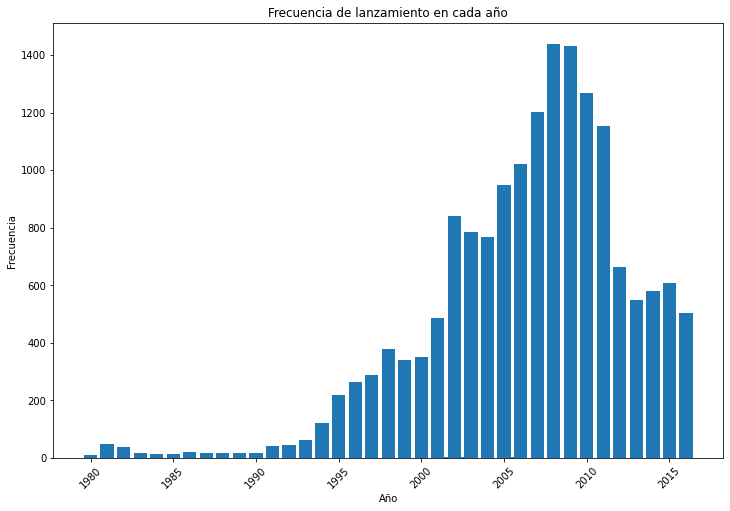

In [26]:
year_counts=data['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12,8))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de lanzamiento en cada año')
plt.xticks(rotation=45)
plt.show()

Se observa que el lanzamiento de videojuegos tuvo un crecimiento exponencial desde 1980 hasta el año 2009 donde obtuvo su pico, que cae de forma abruta y se estabiliza en 600 lanzamientos anuales aproximadamente a partir del año 2011.

Se analizará tambien las ganancias anuales para observar que año obtuvo los mejores reditos economicos. 

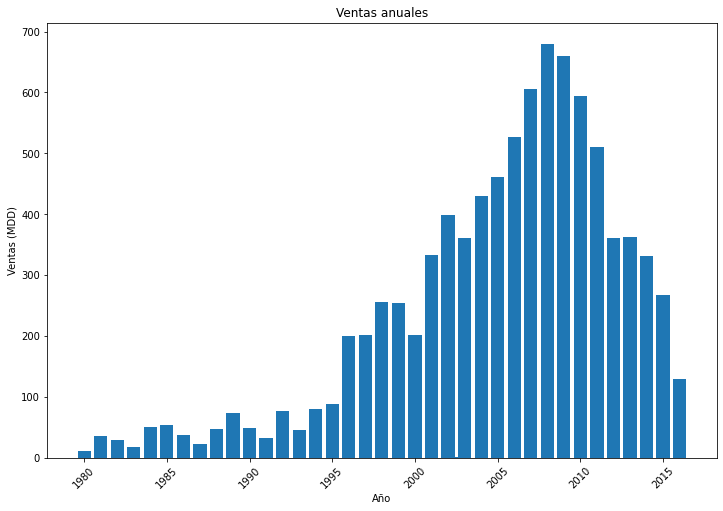

In [27]:
total_sales_year=data.groupby('year_of_release')['total_sales'].agg('sum').sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.bar(total_sales_year.index, total_sales_year.values)
plt.xlabel('Año')
plt.ylabel('Ventas (MDD)')
plt.title('Ventas anuales')
plt.xticks(rotation=45)
plt.show()

Al igual que sucedió con los lanzamiento, se observa que las ganancias tuvieorn un crecimiento exponencial desde 1980 hasta el año 2009 donde obtuvo su pico, y luego va bajando, teniendo una estabilidad en aproximadamente 300MDD. Para el ultimo año se tiene que bajo aún más pero esto podría deberse a que los datos obtenidos no comprenden todos los lanzamientos realizados en el 2016 ya que esta base de datos fue entregada para realizar un estudio para el 2017, por lo que puede ser que los datos hayan sido recogidos hasta mediados del 2016.

## Ventas entre plataformas
En esta sección se estudiará como evolucionan las ventas anuales entre cada plataforma. El primer paso será observar que plataformas tiene la mayor cantidad de ventas:

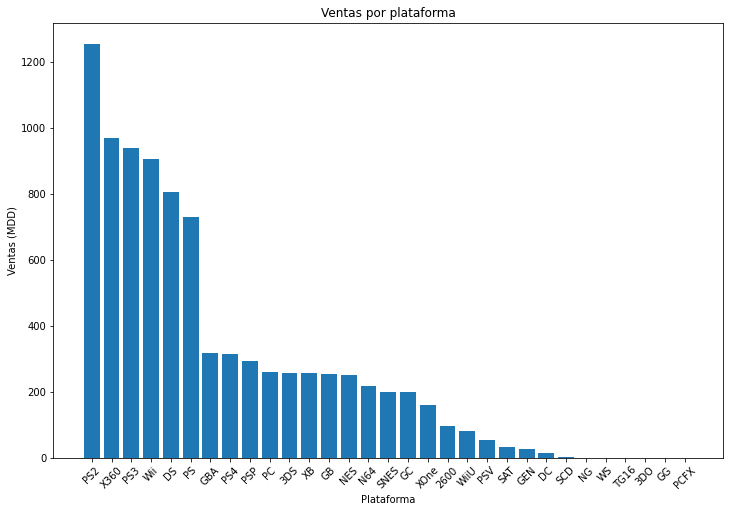

In [28]:
total_sales_platform=data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.bar(total_sales_platform.index, total_sales_platform.values)
plt.xlabel('Plataforma')
plt.ylabel('Ventas (MDD)')
plt.title('Ventas por plataforma')
plt.xticks(rotation=45)
plt.show()

Realizando un análisis de los datos de ventas totales para cada plataforma se observa que la plataforma que más ventas ha tenido hasta el año analizado es PS2. 

Se analizará tambien la cantidad de juegos que se han lanzado por plataforma

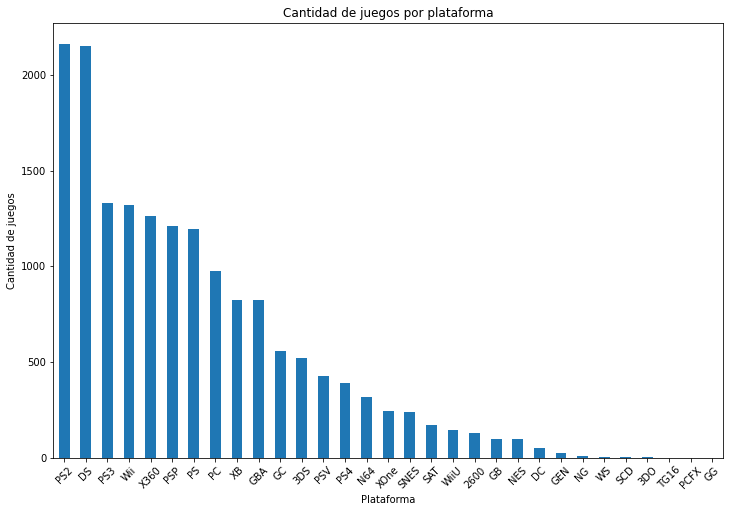

In [29]:
games_platform=data['platform'].value_counts()

plt.figure(figsize=(12,8))
games_platform.plot(kind='bar')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juegos por plataforma')
plt.xticks(rotation=45)
plt.show()

Las dos plataformas que mayor cantidad de juegos han sido lanzados es PS2 y DS

Ahora vamos a obsrevar como han ido evolucionando las ventas para cada plataforma dependiendo de los años de lanzamiento:

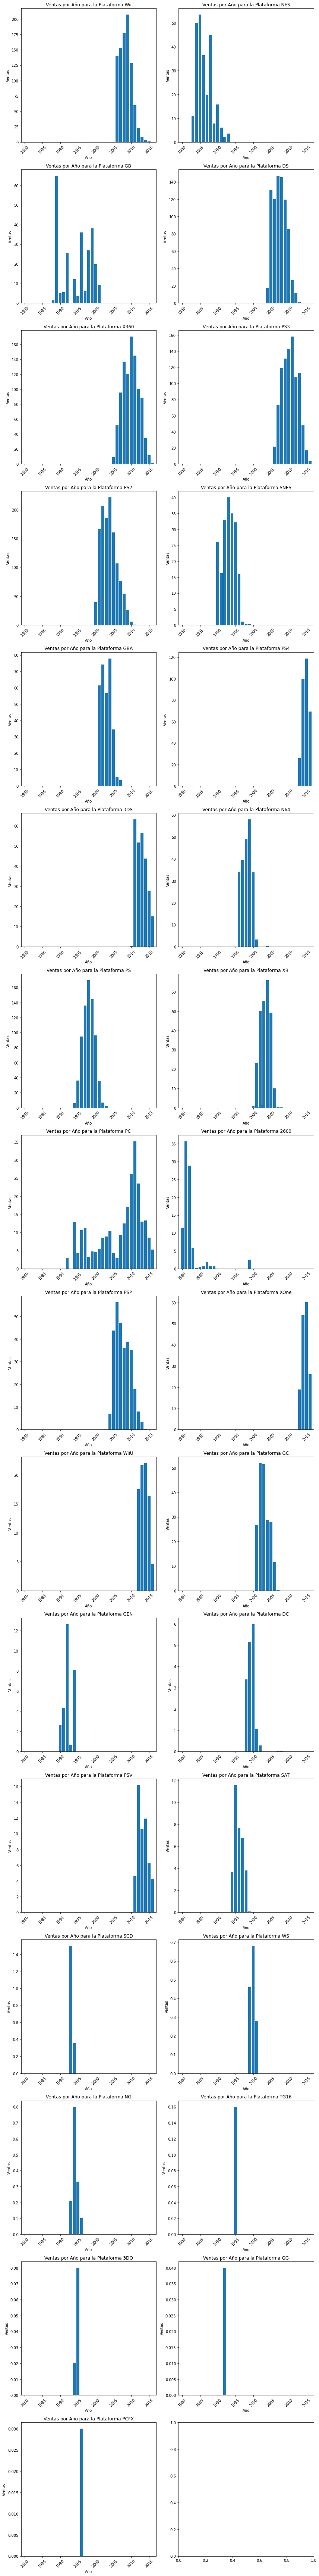

In [30]:
# Se agrupa los datos por plataforma y año para sumar las ventas que tuvieron cada año
platform_grouped=data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

# Variable para almacenar la lista de plataformas únicas
platforms=data['platform'].unique()

num_rows= (len(platforms)+1)//2
num_cols=2

#Matriz de subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,6*num_rows))

#Iteración para cada platafomra y para gráfico
for i, platform in enumerate(platforms):
        platform_data = platform_grouped[platform_grouped['platform'] == platform]
        row = i // num_cols
        col = i % num_cols
        ax = axes[row,col]
        ax.bar(platform_data['year_of_release'], platform_data['total_sales'])
        ax.set_xlim(1979, 2017)
        ax.set_xlabel('Año')
        ax.set_ylabel('Ventas')
        ax.set_title(f'Ventas por Año para la Plataforma {platform}')
        ax.tick_params(axis='x', rotation=45)

# Esto ajusta el espacio entre subplots
plt.tight_layout()
plt.show()


Despues de observar las gráficas generadas de las ventas para cada plataforma por año se observa la siguiente información.
- Existen plataformas las cuales no tuvieron una cantidad considerable de ventas. Estas plataformas tuvieron lanzamientos en un pequeño intervalo de tiempo, en su mayoría se acumulan solo un año, algunas hasta 3 años pero con ventas muy bajas. En general estas plataformas no superaron el los 2 millones en ventas en ningun año de los lanzamientos de sus juegos. 
- Tambíen se tienen plataformas que puede considerarse que tuvieron una cantidad mediana de éxito. Estas plataformas tuvieron nuevos lanzamientos por aproximadamente 5 años y sus ventas estan entre 5 y 20MDD en al menos uno de los años en los que se vendieron
- Las plataformas altamente exitosas se puede considerar a las cuales tuvieron 5 o más años de lanzamientos y ventas mayores a 20MDD al menos en algun año. En esta categoría pueden caer consolas como XBOX ONE o PS4 a pesar de que solo tienen 4 años de lanzamientos, pero esto se debe a que la base de datos solo abarca hasta el 2017 y las consolas aún estaban despuntando. Estas consolas tiene ventas de más de 50 Millones, por lo que se consideraran como altamente exitosas. Muchas de estas plataformas exitosas tuvieron lanzamientos por aproximadamente 10 años
- Un caso particular es la plataforma PC, la cual ha tenido varios picos desde 1993 y ha estado vijente por más de 20 años, por lo que se puede considerar que esta plataforma siempre ha tenido ventas.

<div class="alert alert-block alert-info">
<b>No entendí la sugerencia, creo que se refiere a plotear todas las gráficas en un solo gráfico, pero eso haría que no se entienda nada o me equivoco? </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

para la ventas a nivel de plataformas en serie de tiempo puedes plotear todas en una con un plot de serie de tiempo

<div class="alert alert-block alert-warning">
<b>Comentario revisor V2</b> <a class="tocSkip"></a>

No necesariamente mira esta imagen https://www.sweetspot.com/es/wp-content/uploads/sites/6/2018/05/line-graph-straight-line.png. Los colores serian cada plataforma.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buen analisis se demuestra el buen analisis del proceso<div>

### Determinar periodo de estudio
Revisados los datos anteriores se ha decidido tomar las siguientes consideraciones:
- Cada plataforma tiene un periodo en el cual es exitosa y se realizan lanzamientos de manera constante (a excepción de PC el cual ha tenido lanzamientos casi todo el periodo de tiempo analizado), por lo cual analizar información de datos muy antiguos puede no ser reelevante si se quiere realizar nuevos lanzamientos.
- Hay nuevas plataformas actualmente, las cuales no tienen más de 4 años(considerando los datos entregados) de existencia, por lo cual el análisis va a ser enfocado para esas plataformas.
- Teniendo en cuenta los puntos mencionados, vamos a enfocar el análisis en los juegos más actuales, y para esto se considerará a aquellos lanzamientos que no superen los 5 años, osea, los que sean iguales o superior al 2011

<div class="alert alert-block alert-info">
<b>Se ha cambiado el .query para que tome los años de lanzamiento superiores o iguales al 2011</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Debes tomar un filtro que sea en base al año y no debe superar los 5 años, ya que hay consolas que ya murieron y no venden tanto para sacar un analisis actual de las ventas de videojuegos **HECHO**<div>

In [31]:
best_platform=data.query('year_of_release >= 2011 ')
best_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Diagrama de caja para ventas por plataformas
Una vez seleccionadas la plataformas que se van a analizar se va a realizar un diagrama de caja para observar como se han distribuido las ventas totales para cada plaaforma, con el fin de encontrar algun patron.

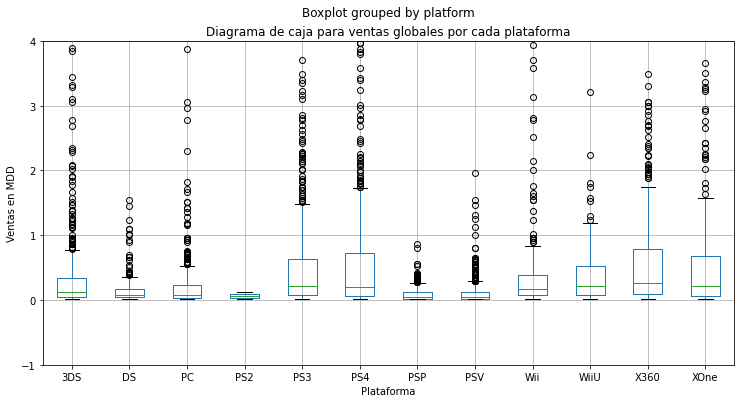

In [32]:
best_platform.boxplot(column='total_sales', by='platform', figsize=(12,6))
plt.ylabel('Ventas en MDD')
plt.xlabel('Plataforma')
plt.ylim(-1,4)
plt.title('Diagrama de caja para ventas globales por cada plataforma')
plt.show()

Una vez obtenida la grafica se ha detectado la siguiente información:
- Se observa que existen muchos datos que podría considerarse atípicos para cada plataforma, pero en realidad son videojuegos que tuvieron mucho exito. En cada plataforma existen lanzamientos que superaron por mucho el promedio de ganancia, las plataformas que generaron mas éxitos son PS3, X360, 3DS y PS4. El que menos lanzamientos exitosos tuvo fue PSV.
- Las plataformas cuyos mejores promedios en ventas tuvieron son PS3, PS4, X360 y XOne.
- Las plataformas que en promedio tuvieron las ventas más bajas son DS, PS2, PSP y PSV. Algunas de estas plataformas ya fueron descontinuadas, por lo cual es razonable que sus ventas sena muy bajas 

### Influencia de las reseñas de usuarios y profesionales en las ventas de una plataforma (PS3)
En la actualida existen muchas personas y empresas que se dedican a recolectar información sobre la experiencia de usuarios con videojuegos. Estas experiencias llevar califiaciones numéricas las cuales representan que tan disfrutable fue el videojuego. En muchos de los casos estas calificaciones suelen influir en gran medida a nuevos usuarios en la decisión de comprar o no un nuevo título lanzado. Con los datos que tenemos, se va a verificar si estas calificaciones de verdad tuvieron un impacto importante en la cantidad de ventas que tuvieron los videojuegos de una plataforma en particular. Para nuestro caso de análisis se ha escogido la paltaforma que más ingresos ha generado: PS3.

Correlación precio vs Calificación de Críticos 0.43243156856420606
Correlación precio vs Calificación de Usuarios 0.12669133936341712


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

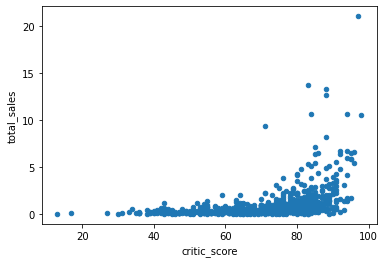

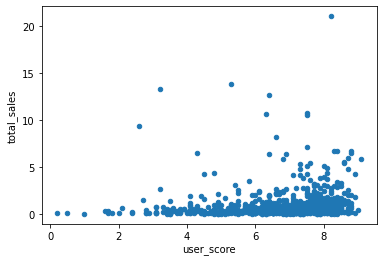

In [33]:
#Revisando niveles de correlación:
ps3_sales=data.query('platform in "PS3"')

print('Correlación precio vs Calificación de Críticos', ps3_sales['total_sales'].corr(ps3_sales['critic_score']))
print('Correlación precio vs Calificación de Usuarios', ps3_sales['total_sales'].corr(ps3_sales['user_score']))


#Gráficas de correlación para critic_score y user_score vs total_sales

ps3_sales.plot(x='critic_score', kind='scatter', y='total_sales')
ps3_sales.plot(x='user_score', kind='scatter',y='total_sales')

De los gráficos y datos obtenidos se puede obtener las siguientes conclusiones:
- Existe una relación directa entre la calificacion de críticos el total de ventas para cada juego. Se observa que el nivel de correlación es relativamente alto, siendo de 0.43, por lo que se puede conisderar que influye en las ventas, siendo que, los juegos mejor calificados obtienen mayores ventas, a pesar de que se observa casos en los que esto no sucedió.
- En el caso de la correlación entre las calificaciones de los usuarios vs total de ventas se observa que existe una relación directa (0.12) pero no se puede decir de forma general que buena reseña por parte de los usuarios implica que los juegos generen más ventas para la mayoría de los casos. Esto podría significar que los usuarios tienden a seguir más las reseñas de los críticos que de otros usuarios al momento de decidir si comprar un videojuego o no.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Correcto! Eso es lo que esta sucediendo <div>

### Comparación de influencia de críticos en los mismos videojuegos de PS3 en diferentes plataformas
Se realizará un filtro en el cual se escojan los mismos juegos que se analizaron en el PS3 y se comparará con las ventas en otras plataformas, considerando la influencia de los críticos como se hizo perviamente:

In [34]:
data_no_ps3=data.query('platform not in "PS3" and name in @ps3_sales.name')
data_no_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16647,Metal Gear Solid HD Edition,X360,2011.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16651,The Rise of the Argonauts,PC,2008.0,Role-Playing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Correlación precio vs Calificación de Críticos 0.3410183959515286
Correlación precio vs Calificación de Usuarios 0.07485391613004966


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

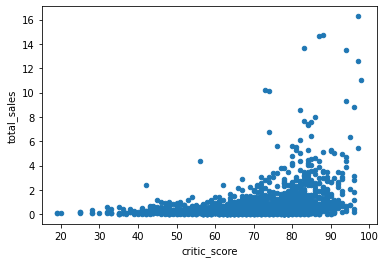

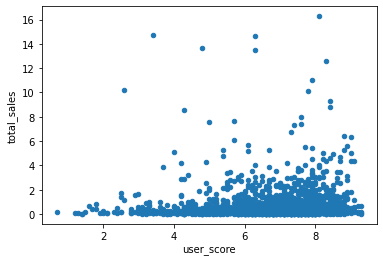

In [35]:
print('Correlación precio vs Calificación de Críticos', data_no_ps3['total_sales'].corr(data_no_ps3['critic_score']))
print('Correlación precio vs Calificación de Usuarios', data_no_ps3['total_sales'].corr(data_no_ps3['user_score']))


#Gráficas de correlación para critic_score y user_score vs total_sales

data_no_ps3.plot(x='critic_score', kind='scatter', y='total_sales')
data_no_ps3.plot(x='user_score', kind='scatter',y='total_sales')

De los gráficos y datos obtenidos se puede obtener las siguientes conclusiones:
- Al igual que ocurrio solo con PS3, las calificaciónes de críticos y usuarios tienen cierto nivel de influencia en las ventas de los videojuegos para las diferentes plataformas, sin embargo se observa que en las demás plataformas la influencia es menor que para PS3. Se tiene que para la calificación de los críticos es una correlación de 0.34 y para la calificación de los usuarios es una correlación de 0.7.

### Distribución general de los juegos por género
Otro análisis que se va a realizar es como se distribuyen los ingresos dependiendo de los géneros. Se analizará que géneros son más rentables de las plataformas más importantes.

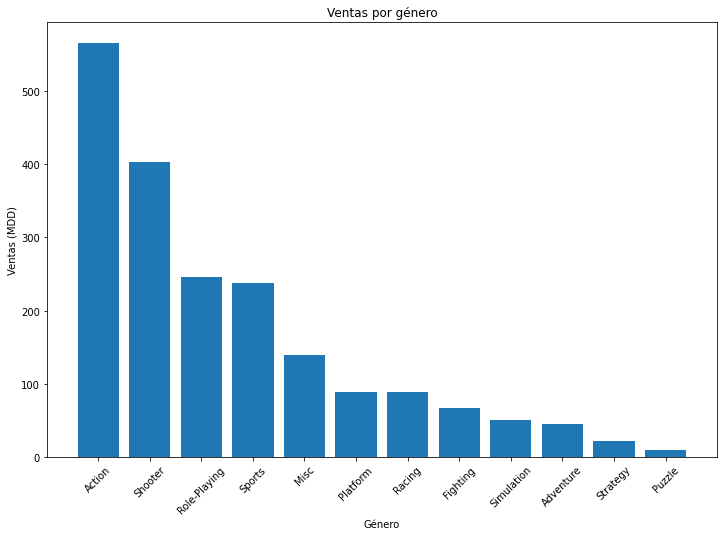

In [36]:
genre_sales=best_platform.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.bar(genre_sales.index, genre_sales.values)
plt.xlabel('Género')
plt.ylabel('Ventas (MDD)')
plt.title('Ventas por género')
plt.xticks(rotation=45)
plt.show()

De la gráfica obtenida se puede obtener la siguiente información:
- El género que más dineró aporta a la industria es el de acción, seguido por lo shooters. Este tipo de juegos genera una grán cantidad de ingresos, que superan por mucho a los demás lugares.
- Los generos que menos ingresos perciben son los de estrategia, aventura y puzzle.
- A pesar de que están claramente distinguidos en esta gráfica los generos más y menos exitosos, no se puede concluir que esta tendencia sea igual para todas las regiones analizadas. Esto analizará en la siguiente sección.

## Perfil de usuario para cada región
Una parte importante de nuestro análisis es estudiar que factores influyen en la compra de un videojuego dependiendo de la región en la que es lanzado. El éxito de una campaña depende mucho de dirigir los productos al tipo de cliente que tenga más probabilidad de comprarlo, por lo que se analizará como dan las ventas en las tres principales regiones: US, UE y JP.
Como primer punto se analizará como estan las ganancias para las plataformas más importantes dependiendo de la region:

<function matplotlib.pyplot.show(close=None, block=None)>

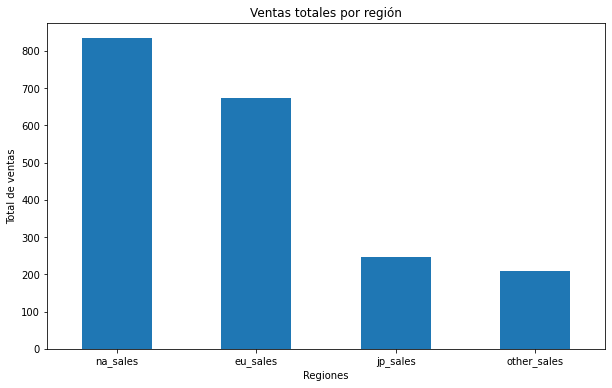

In [37]:
# Se creará una gráfica para analizar las ventas totales por regiones:
plt.figure(figsize=(10,6))
best_platform[['na_sales', 'eu_sales','jp_sales','other_sales']].sum().plot(kind='bar')
plt.xlabel('Regiones')
plt.ylabel('Total de ventas')
plt.title('Ventas totales por región')
plt.xticks(rotation=0)
plt.show

Se observa que el mercado más grande para los videojuegos es la región NA. 

### Géneros más exitosos por región:

Como siguiente paso vamos a revisar cuales son los  géneros más exitosos para cada región.

In [38]:
# Función para graficar automáticamente las estadísticas de ventas por genero dependiendo de la región:
def bar_graph(df,region):
    data=df.groupby('genre')[region].agg('sum').sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    plt.bar(data.index, data.values)
    plt.xlabel('Género')
    plt.ylabel('Ventas (MDD)')
    plt.title(f'Ventas por género para la región {region}')
    plt.xticks(rotation=45)
    plt.show()
    

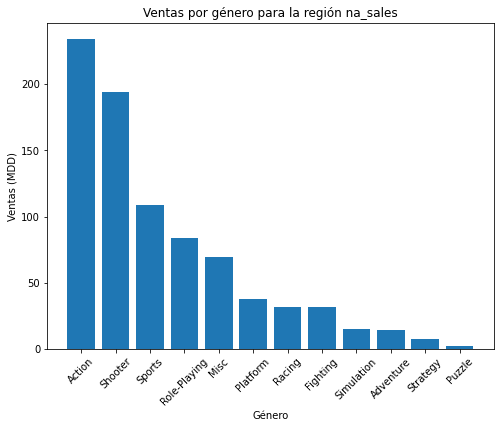

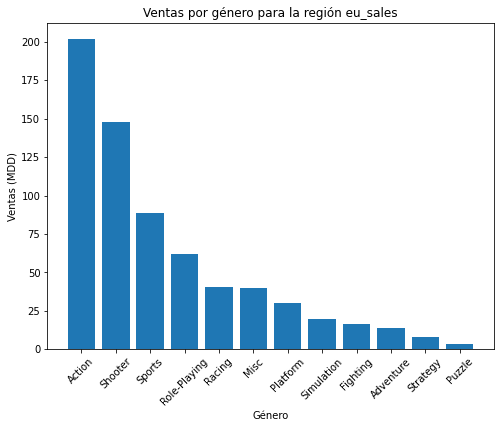

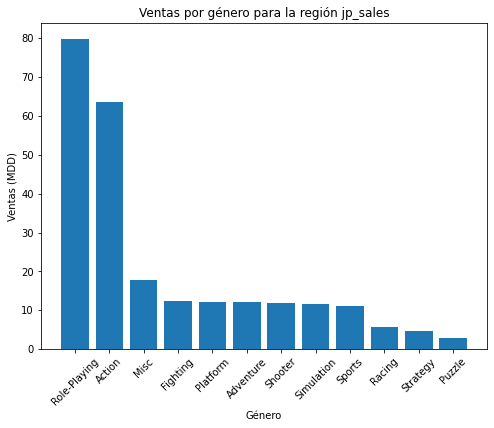

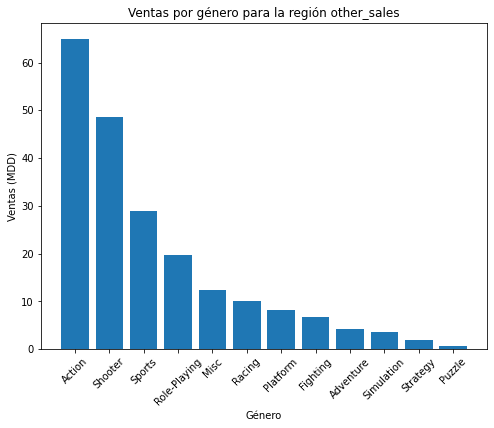

In [39]:
bar_graph(best_platform,'na_sales')
bar_graph(best_platform,'eu_sales')
bar_graph(best_platform,'jp_sales')
bar_graph(best_platform,'other_sales')


De las gráficas obtenidas se puede obtener la siguiente información:
- Las regiones EU, NA y Other tienen patrones similares en cuanto a los tres géneros que más consumen, los cuales son Action, Shooter y Sports, y al mismo tiempo comparten los géneros que menos interés generan: Adventure, Strategy y Puzzle. Esto nos puede dar una idea de qué generos van a tener más exito en los nuevos lanzamientos para estas regiones.
- La región de JP tiene un comportamiento diferente en sus géneros más exitosos. Para esta área el género más exitoso son los juegos Role-Playing, genero que en otras regiones ocupa tambien entre los primeros lugares pero no genera la cantidad de ventas que genera en JP. En el caso de los generos que menos ingresos generan son similares a las demas regiones con Strategy y Puzzle, pero en esta región se incluye a esta lista racing, el cual para otras regiones tiene posiciones más altas.
- Con esta información se puede desarrollar una estrategia de lanzamientos para cada región considerando que tipos de género son los más exitosos

### Influencia de las clasificaciónes de ESRB para cada región
Otro dato muy importante en los videojuegos, en particular en tiempos recientes, es el sistema de clasificación ESRB, el cual fue diseñado para establecer el público al cual es destinado un videojuego. Este dato es muy útil en particular para los padres, dado que este sistema califica a los videojuegos por su contenido de violencia física o verbal y otros elementos como el contenido sexual, de tal manera que los padres y consumidores de forma general pueden escoger los videojuegos correctos para su familia. En base a este dato, se va a investigar cual de las categorías de ESRB son las más populares en cada región.

In [40]:
# Función para graficar automáticamente las estadísticas de ventas por calificación ESRB dependiendo de la región:
def bar_graph_esrb(df,region):
    data=df.groupby('rating')[region].agg('sum').sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    plt.bar(data.index, data.values)
    plt.xlabel('Género')
    plt.ylabel('Ventas (MDD)')
    plt.title(f'Ventas por rating ESRB para la región {region}')
    plt.xticks(rotation=45)
    plt.show()
    

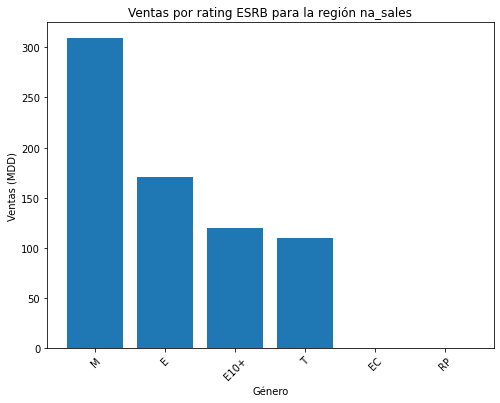

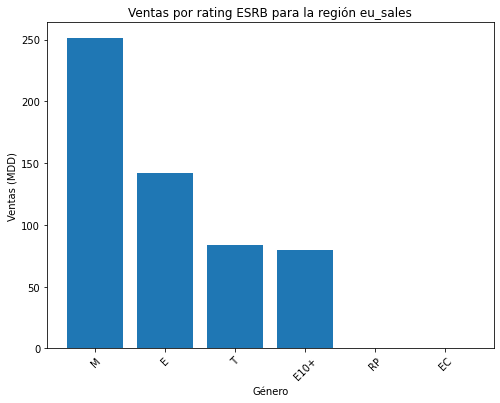

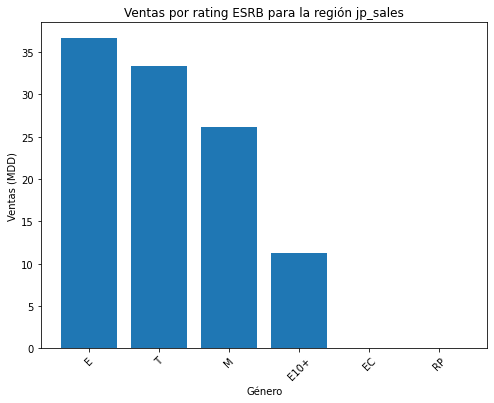

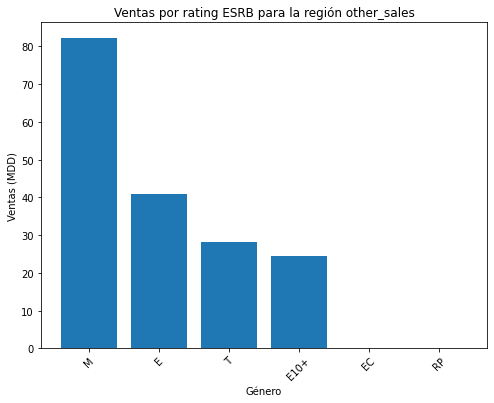

In [41]:
bar_graph_esrb(best_platform,'na_sales')
bar_graph_esrb(best_platform,'eu_sales')
bar_graph_esrb(best_platform,'jp_sales')
bar_graph_esrb(best_platform,'other_sales')

De las gráficas obtenidas se puede extraer la siguiente información:
- Al igual que sucedió con los géneros por región, las regiones de NA, EU y other sales comparten el rating ESRB más exitoso, el cual son los videojuegos con calificación M (Mature +17). Los generos T (Teen) y E(Everyone), son los que le siguen en éxito pero este tipo de juegos generan la mitad de ventas cada uno.
- Algo diferente sucede en la región JP donde el tipo de juego más exitoso es T, sin embargo no supera por un gran margen a los juegos con calificación M y E, los cuales ventas similares.

Como conclusión general de esta sección se tiene que efectivamente existe una influencia en la región donde se distribuye un juego para tener éxito, en particular en la región de JP donde los juegos más exitosos son diferentes a las demás regiones respecto al género y a la clasificación ESRB.



### Juegos más exitosos por región
Como dato final se revisará cuales fueron los juegos más exitosos en cada región:

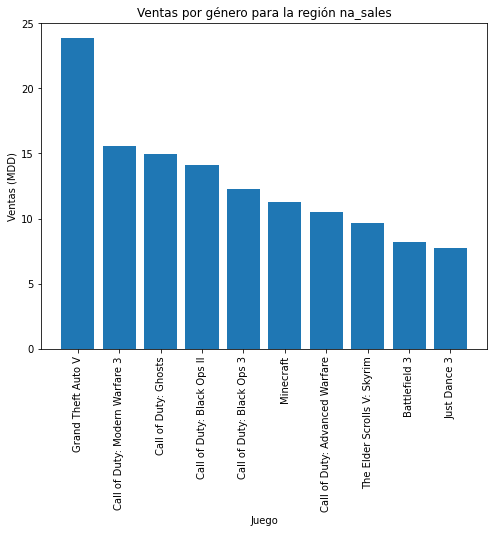

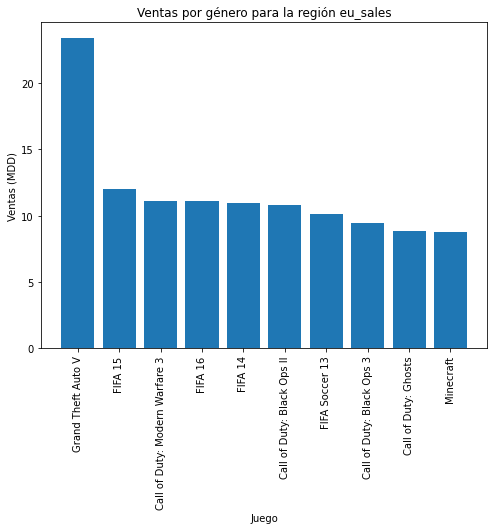

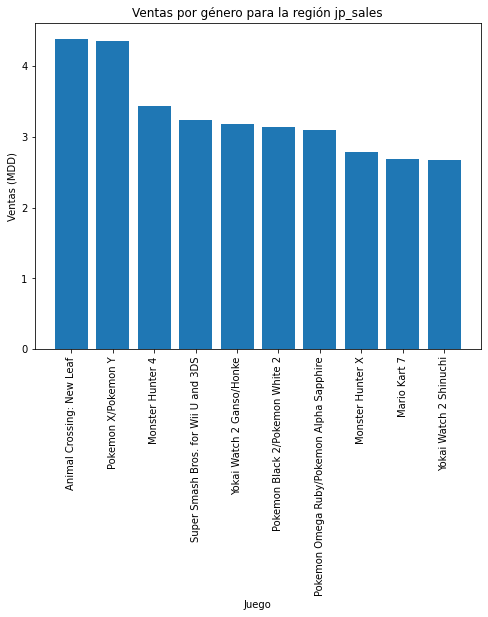

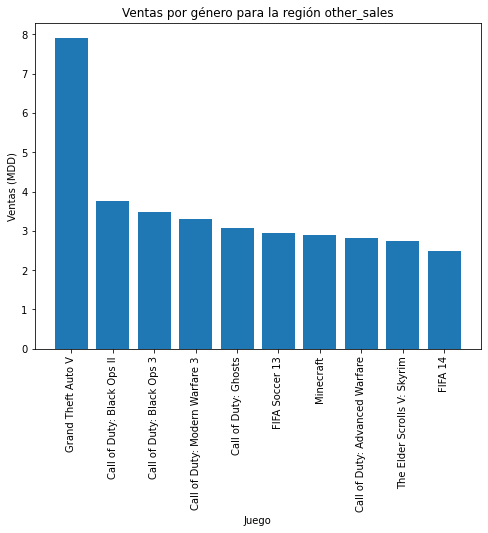

In [42]:
def bar_graph_games(df,region):
    data=df.groupby('name')[region].agg('sum').sort_values(ascending=False)
    top_10games=data.head(10)
    plt.figure(figsize=(8,6))
    plt.bar(top_10games.index, top_10games.values)
    plt.xlabel('Juego')
    plt.ylabel('Ventas (MDD)')
    plt.title(f'Ventas por género para la región {region}')
    plt.xticks(rotation=90)
    plt.show()


bar_graph_games(best_platform,'na_sales')
bar_graph_games(best_platform,'eu_sales')
bar_graph_games(best_platform,'jp_sales')
bar_graph_games(best_platform,'other_sales')

De las gráficas generadas se tiene los siguientes comentarios:
- EL juego GTAV ha sido el juego más vendido en las regiones NA, EU y Other, mientras que en la región de JP el juego más exitoso es Animal Crossing. Con esto se verifica nuevamente la gran diferencia entre preferencias que existen entre la región de JP y las demás regiones. 

<div class="alert alert-block alert-info">
<b>Se ha añadido los juegos más exitosos por región</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Te falta analisis de los juegos que mas han vendido tambien ! **HECHO** <div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buen analisis se demuestra el buen procedemiento, es posible notar diferencias entre JP y los demas paises en rating. Cuando ajustes el año algunas respuestas cambiaran<div>

## Prueba de hipótesis
Para esta sección, despues de haber analizado los datos en base a diferentes variables, se va a realizar pruebas de hipótesis para obtener más información que pueda ser de ayuda para la toma de decisiones. 

### Hipótesis 1
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Esta hiótesis se realiza debido a que Microsoft es dueño de Xbox y del sistema operativo de Windows en el cual funcionan la mayoría de juegos lanzados para PC, por lo que se podría considerar que estas platformas son parte del mismo dueño y los juegos deberían ser realizados con la missma calidad. Es por esto que se comprobará esta hipotesis de la siguiente manera:
- H0(Hipótesis nula): Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son iguales
- H1(Hipotesis alternativa): Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes

Se escogerá un nivel crítico de significación estadística del 5%:


<div class="alert alert-block alert-info">
<b>Se ha cambiado son similiares por iguales.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

H0, casi lo tienes bien, pero es la calificaciones de usuarios son iguales, iguales es difernete a decir similares en terminos matematicos **HECHO**<div>

In [43]:
alpha = 0.05 # Nivel crítico de significación estadística

#Filtrar y eliminar NaN de las columnas user_score, dado que da un error al calcular el p-value
data_xone=data.query('platform in "XOne"').dropna(subset=['user_score'])
data_pc=data.query('platform in "PC"').dropna(subset=['user_score'])

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

p-value: 4.935072360183565e-06
Rechazamos la hipotesis nula


Con el análisis realizado se ha rechazado la hipotesis nula. Estoy nos indica que las calificaciones promedio entre estas dos plataformas difieren en gran medida, por lo que a pesar de estas dos plataformas generar videojuegos de básicamente de un mismo creador, las calificaciones que reciben de parte de los usuarios no son similares.

Adicional se realizará una prueba de Levene, ya que el test de medias puede ser influenciado por el tipo de varianzas. para esto se planteará las siguientes hipótesis:

- H0(Hipótesis nula): Las varianzas de las calificaciones de los usuarios de las plataformas Xbox One y PC son iguales
- H1(Hipotesis alternativa): Las varianzas de las calificaciones de los usuarios de las plataformas Xbox One y PC no son iguales

In [44]:
from scipy.stats import levene

# Realizar la prueba de Levene
statistic, p_value = levene(data_xone['user_score'], data_pc['user_score'])

# Imprimir los resultados
print("Estadística de Levene:", statistic)
print("p-value", p_value)

# Realizar una decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No rechazamos la hipótesis nula: Las varianzas son iguales.")

Estadística de Levene: 1.2212506384014863
p-value 0.2693951512047048
No rechazamos la hipótesis nula: Las varianzas son iguales.


Se observa que según la prueba de Levene, se ha rechazado la hipótesis nula y las variazas son similares, por lo que se puede decir que no han afectado a la hipótesis anterior.

<div class="alert alert-block alert-info">
<b>Se añadió una prueba de Levene.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Podrias agregar si quieres un analisis de igualdad de varianzas, el metodo levene te puede funcionar, ya que el test de medias se puede ver influenciado por el tipo de varianzas<div>

### Hipotesis 2
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Esta hipótesis se basa en que, estos géneros son sumamente diferentes entre sí y como se observó en las gráficas de ingresos, los usuarios preferien en gran medida los géneros de acción que los géneros de deportes. Es probable que las calificaciones entre estos generos difieran mucho y por lo tanto la gran diferencia en ventas entre estos dos. Esta hipotesis se comprobará de la siguiente manera:

-H0(Hipotesis nula): Las calificaciones promedio de los usuarios de los generos de Acción y Deportes son diferentes.
-H1(Hipotesis alternativa): Las calificaciones promedio de los usuariosde los generos de Acción y Deportes son similares.

Se escogerá un nivel crítico de significación estadística del 5%:

In [45]:
alpha = 0.05 # Nivel crítico de significación estadística

#Filtrar y eliminar NaN de las columnas user_score, dado que da un error al calcular el p-value
data_action=data.query('genre in "Action"').dropna(subset=['user_score'])
data_sports=data.query('genre in "Sports"').dropna(subset=['user_score'])

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

p-value: 0.11483818791498286
No rechazamos la hipotesis nula


Con este análisis no se puede rechazar la hipótesis nula, por lo que podríamos decir que las calificaciones promedio que los usuarios dan a los juegos de Acción y Deportes son diferentes, por lo que esto puede ser una razón por la cual la mayoría prefiere los juegos de Acción.

## Conclusiones:
Despues de haber realizado una depuración de los datos obtenidos y realizar un análisis completo de los mismos se ha llegado a las siguientes conclusiones:
- Los datos de forma general fueron obtenidos de manera óptima, ya que la cantidad de correcciones que se tuvo que hacer fueron mínimas, y se enfocaron más en la facilidad para escribir el código como el cambio de los nombres de las columnas para que todas esten en minúsculas, o la eliminación de dos filas datos que no contenían información relevante.
- Para el caso de los valores ausentes, en la columna de year of release se encontro algunos juegos que no tenían este dato. En una primera instancia se logro rellenar este dato con información que esta dentro del nombre del juego que indica su año de lanzamiento, como por ejemplo Fifa2013. Para los casos en los que no se tenía esta información se rellenó utilizando la información de la plataforma. Se buscó los años de lanzamiento de cada juego para cada plataforma y dado que los lanzamientos ocurren en un espacio de tiempo determinado se colocó la mediana de cada plataforma en los juegos que tenian el dato adel año de lanzamiento ausente.
- Para los datos ausentes de critic_score, user_score y rating se decidió no rellenar los valores NaN con algun dato, por facilidad de calculos posteriores, ya que se puede eliminar más facilmente los valores NaN que otro tipo de datos. Estos valores ausentes solo significan que los juegos no fueron calificados en su mayoría por su año de lanzamiento (ya que las críticas hacia videojuegos no llegaron de forma oficial sino hasta recientemente).
- Realizando el análisis de los lanzamientos anuales para cada año se observa que los videojuegos comenzaron a tener una escalada a partir del año 1995. Esto se puede deber al aparecimiento de nuevas consolas, las cuales poseían capacidades muy superiores y podían correr juegos de mejor calidad.
- EL pico máximo de lanzamientos está alrededor del año 2009 donde se lanzaban una gran cantidad de juegos y esto también se ve reflejado en las ganancias donde se tiene también las ganancias más altas.
- A partir del 2009 se observa una caída en la cantidad de juegos lanzados y en las ganancias generadas. Esto puede ser causado por varias razones, entre las cuales se ha intuído que podria ser: La gran recesión económica mundial que hubi en el 2009. El dominio en el mercado de videojuegos por parte de Xbox, PlayStation y Nintendo, por lo que muchas consolas de otros fabricantes desaparecieron y por lo tanto la cantidad de juegos se redujo. El desarrollo de plataformas más potentes, las cuales creaban juegos mucho más complejos que requerían de más tiempo para su creación, por lo que se realizaban una menor cantidad de juegos anualmente.
- En relación a las plataformas más exitosas, se ha obtenido como dato que PS2 ha sido la consola más exitosa de la historia, generando más de 1200 MDD en ventas totales. Ademas es la consola que mayor cantidad de videojuegos han sido lanzados conjunto con DS siendo que su plataforma tuvo disponible mas de 2000 lanzamientos.
- Se observó que existen tres categorás en las cuales podemos agrupar la duración en el mercado de las plataformas. Las que tuvieron menos exito estuvieron menos de 3 años con nuevos lanzamientos. Las que tuvieron un exito mediano tuvieron lanzamientos de nuevos videojuegos por aproximadamente 5 años y las de un gran exito tuvieron nuevos lanzamientos por aproximadamente 10 años.
- Con respecto a rentabilidad, se puede agrupar las plataformas de la misma manera que en el punto anterior en tres categorías. Hay plataformas que no superaron los 5MDD, las cuales se pueden considerar como poco exitosas. Las plataformas que tuvieorn ganancias entre 5MDDD y 20MDD se puede considerar casos con un éxito medio. Por su parte, las plataformas que lograron ventas superiores a los 20MDD se pueden considerar como muy exitosas.
- Considerando que el estudio es realizado para realizar una proyección y tomar decisiones en cuanto a lanzamientos para el 2017, se hizo un filtrado de los datos para que considere solo las plataformas que aun tienen lanzamientos para los años recientes, entre las cuales estan: WiiU, XOne, PC, 3DS, PSV, PS4, PS3 y X360. Entre las plataformas mensionadas anteriormente las que más lanzamientos exitosos ha tenido es PS3, X360, 3DS y PS4.
- Tomando en cuenta que PS3 es una de las plataformas que más éxito ha tenido en tiempos recientes, se hizo un análisis de la influencia de las reseñas de usuarios y críticos en el éxito en ventas de los juegos lanzados de esta plataforma. Como resultado se obtuvo que efectivamente una buena reseña de un crítico influye en mayores ventas, pero las reseñas de otros usuarios no tienen un impacto tan grande. Para otras plataformas esta relación sigue existiendo pero es menos marcada.
- En relación a los géneros más populares, se observó que en general los juegos más exitosos son Action, Shooter y Sports, sin embargo, esta preferencia se ve presente en todas las regiones, menos en JP, donde los juego sde Role-Playing son más exitosos, por lo que convendría de preferencia en esta región realizar juegos enfocados más para esta categoría.
- Algo similar sucedió con las categorías de ESRB, donde se evidenció que las categorías M son las más populares en todas las regiones, a excepción de la región de JP donde es más exitosa la categoría T.
- Se presentaron dos hipótesis para ser verificadas, la primera era que las calificaciones promedio de los usuarios de plataformas XOne y PC eran similares, a cual fue rechazada, dando por entender que tienen diferencias sustanciales y la segunda hipotesís era que las calificaciones promedio de los usuarios de los generos de Acción y Deportes son diferentes, la cual no pudo ser rechazada, por lo que podemos considerar que si hay diferencias entre las calificaciones promedio de estos dos géneros.
- Finalmente se puede concluir que para una futuro lanzamiento para el 2017 se debe dividir el mercado entre todas las regiones menos JP la cual necesitaría otro tipo de enfoque. Para las regiones de NA, EU y Others se ha escogido que el enfoque de los nuevos lanzamientos debe estar dirigido a los géneros más populares, los cuales son Action, Shooter, Sports, y Role-Playing, con una enfoque mayor en los juegos Action, y que se encuentren dentro de la calificación ESRB de: M, T y E, dando un mayor enfoque a M. Para la región JP los lanzamientos deben enfocarse a los géneros más populares que son: Role-Playing, Action, Shooter y Fighting, con un enfoque mayor en Role-Playing y que se encuentren dentro de la calificación ESRB de: T, M y E, dando prioridad a los juegos con calificación T.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, ya puedes ver que de los datos se pueden obtener diversas inferencias y depende del cliente tomar las mejores decisiones a lo que quiere encaminar y mejorar su negocio ! <div>